### Trying to imlement a variation of template matching to detect spikes. It is generally used for sorting, but I can try to make it work by using thresholds on correlation coefficients

In [1]:
import numpy as np
import pylab as pl

In [2]:
origSpikes = np.loadtxt('./data/spikes0.dat');
output = np.loadtxt('./data/output0.dat');

### Get an up spike template

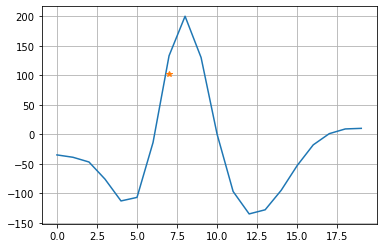

In [3]:
pl.plot(output[1333:1353]);
pl.plot(0.2*origSpikes[1333:1353], '*');
pl.grid()
pl.show();

### Get a down spike template

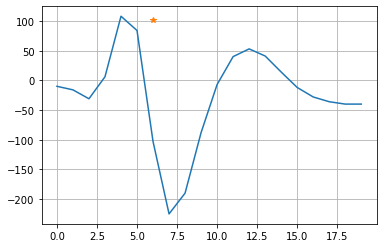

In [4]:
pl.plot(output[3730:3750]);
pl.plot(0.2*origSpikes[3730:3750], '*');
pl.grid()
pl.show();

In [5]:
test_samples = output[3300:3400]
template_up = output[1333:1353]
template_down = output[3730:3750]

for i in range(len(test_samples)-20):
    cc_up = np.corrcoef(template_up, test_samples[i:i+20])[0][1]
    cc_down = np.corrcoef(template_down, test_samples[i:i+20])[0][1]
    print(cc_down)
    if cc_up > 0.4 and test_samples[i+7]>4*22:
        print("spike up", cc_up, i+7)
    if cc_down > 0.4 and test_samples[i+7]<4*22:
        print("spike down", cc_down, i+7)

0.3440066831692195
0.05407679677341857
-0.28064751374164154
-0.5750055483343771
-0.7089438153404808
-0.6078962246910554
-0.3139449998056089
0.0596920785013804
0.3747549424606874
0.5215655677631922
spike down 0.5215655677631922 16
0.48628363156904586
spike down 0.48628363156904586 17
0.37014583158715525
0.23088552840647902
0.052423798071328485
-0.1361248273301621
-0.20642038713828686
-0.1537939222065873
-0.11245858401792119
-0.14353807012581293
-0.1859725112941447
-0.21280404749172832
-0.16706682490742433
-0.03213641308544046
0.08243809302137005
0.17825166227865996
0.20843149143276557
0.15013213473628204
-0.017295298509619517
-0.19437855591456124
-0.3259400145221204
-0.29599826422243186
-0.21337112434721442
-0.04013459732100497
0.19263083911835632
0.32346568688021177
0.2814894688422882
0.10544802110594009
-0.12726348357791625
-0.3276115782121559
-0.3584494338365833
-0.06363113923146364
0.4752290941164294
spike down 0.4752290941164294 48
0.8110570451194803
spike down 0.8110570451194803 4

### This is promising, but it is difficult to get a grasp the threshold of similarity for templates. So, I need to look at a way to trace the spike itelf.